#Global Superstore Sales Model

# Pre Processing Data

In [ ]:
#Import all the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the Dataset
df = pd.read_csv('https://github.com/harshal-96/Data/raw/main/Global_Superstore.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.drop('Postal Code', axis=1, inplace=True)

In [ ]:
df["Customer ID"].nunique()

1590

In [ ]:
df.drop('Row ID', axis=1, inplace=True)

In [ ]:
df["Quantity"].value_counts()

Quantity
2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: count, dtype: int64

In [ ]:
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox

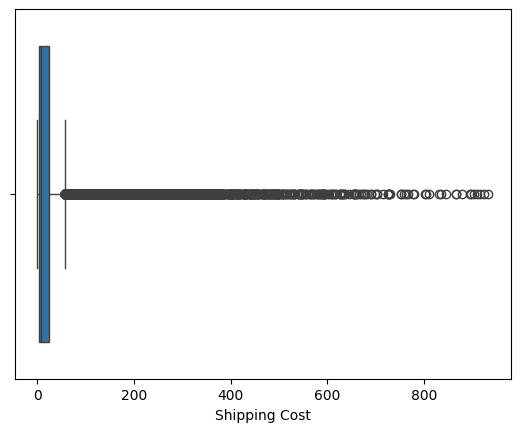

In [ ]:
sns.boxplot(x = df['Shipping Cost'])

plt.show()

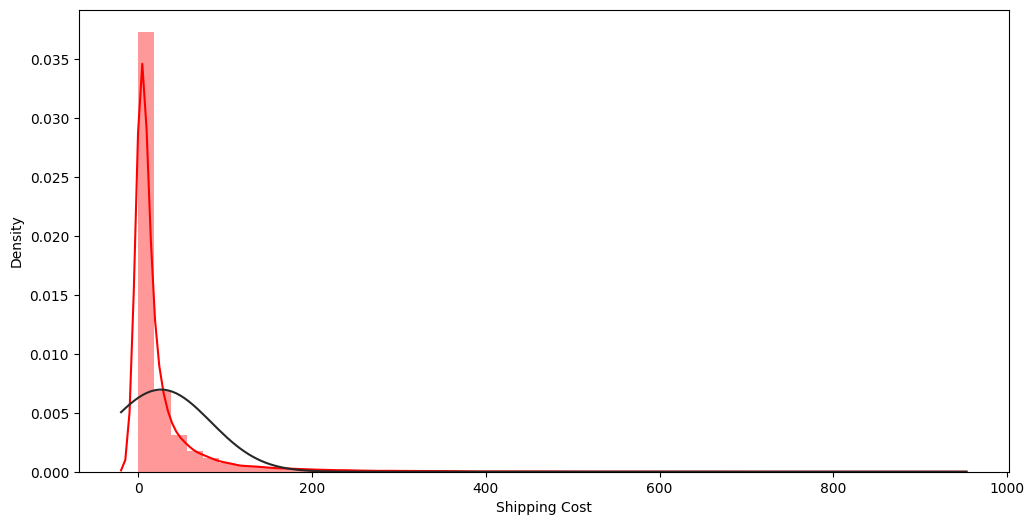

In [ ]:
#Plot and check the distribution
plt.figure(figsize=(12,6))
sns.distplot(df['Shipping Cost'],fit=norm, color ="r")
plt.show()

In [ ]:
print("Skew of raw data: %f" % df['Shipping Cost'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Shipping Cost'],fisher = False))

Skew of raw data: 5.863226
Kurtosis of raw data: 53.015165


In [ ]:
df = df[df['Shipping Cost'] != 0]

Skew after Log Transformation: -0.017664
Kurtosis after Log Transformation: 2.802441


count    51288.000000
mean         2.075367
std          1.597576
min         -4.605170
25%          0.959350
50%          2.052841
75%          3.196630
max          6.839016
Name: Log_Shipping Cost, dtype: float64

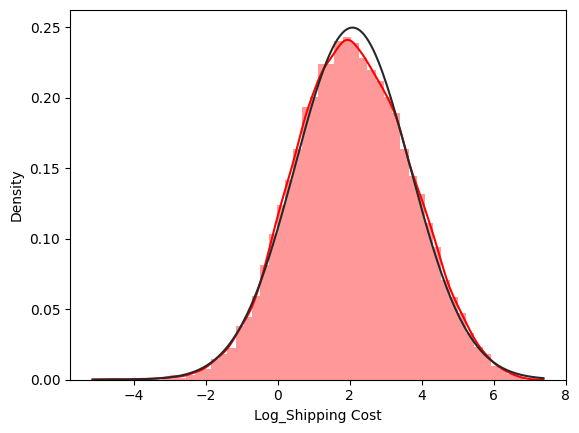

In [ ]:
#log transformation
df['Log_Shipping Cost'] = np.log(df['Shipping Cost'])

#print(df['Shipping Cost'])
#print(df['Log_Shipping Cost'])
#check distribution,skewness and kurtosis
sns.distplot(df['Log_Shipping Cost'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df['Log_Shipping Cost'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df['Log_Shipping Cost'],fisher = False))
df['Log_Shipping Cost'].describe()

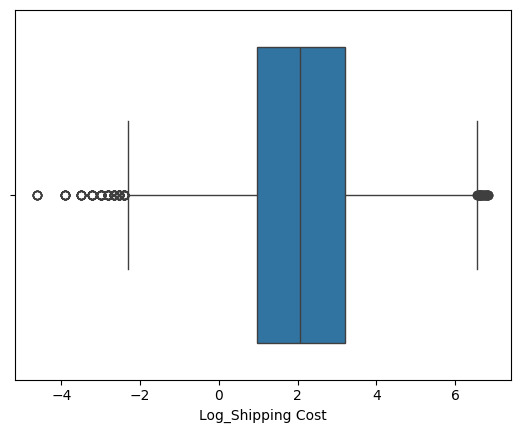

In [ ]:
sns.boxplot(x = df['Log_Shipping Cost'])

plt.show()

1. Here I am making first assumption that these outliers are important for my outcome or predictions, so i will train the dataset with these outliers present.

2. If My Prediction Score Is Affected I will Remove Outliers Later.

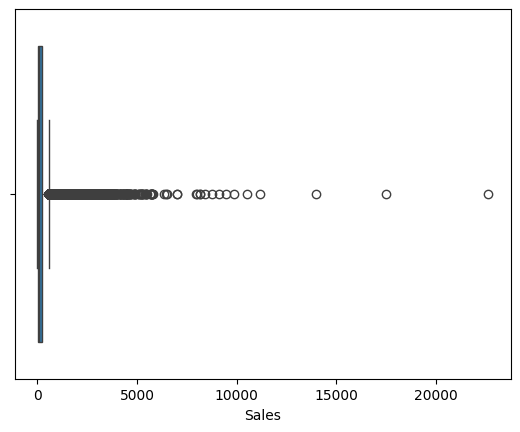

In [ ]:
sns.boxplot(x = df['Sales'])
plt.show()

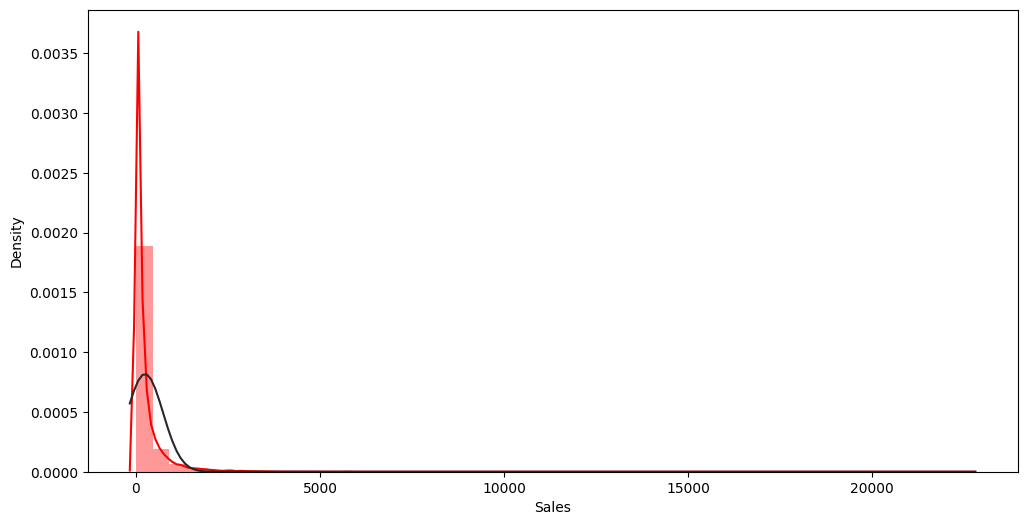

In [ ]:
#Plot and check the distribution
plt.figure(figsize=(12,6))
sns.distplot(df['Sales'],fit=norm, color ="r")
plt.show()

In [ ]:
print("Skew of raw data: %f" % df['Sales'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Sales'],fisher = False))

Skew of raw data: 8.137963
Kurtosis of raw data: 179.708913


Skew after Log Transformation: 0.075472
Kurtosis after Log Transformation: 2.598640


count    51288.000000
mean         4.483642
std          1.457854
min         -0.811931
25%          3.426341
50%          4.443310
75%          5.525754
max         10.027406
Name: Log_Sales, dtype: float64

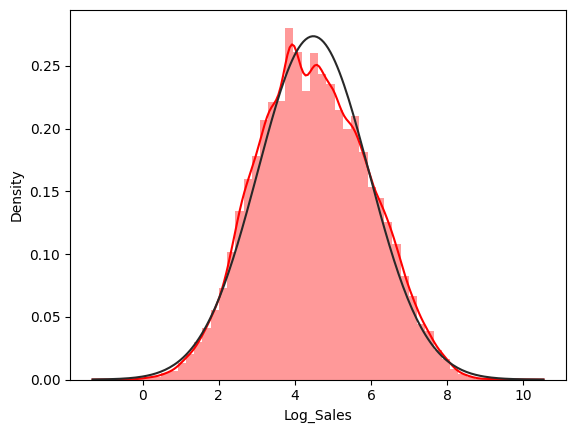

In [ ]:
#log transformation
df['Log_Sales'] = np.log(df['Sales'])

#print(df['Shipping Cost'])
#print(df['Log_Shipping Cost'])
#check distribution,skewness and kurtosis
sns.distplot(df['Log_Sales'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df['Log_Sales'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df['Log_Sales'],fisher = False))
df['Log_Sales'].describe()

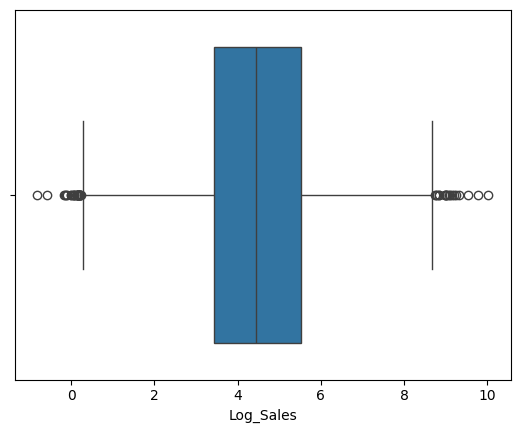

In [ ]:
sns.boxplot(x = df['Log_Sales'])
plt.show()

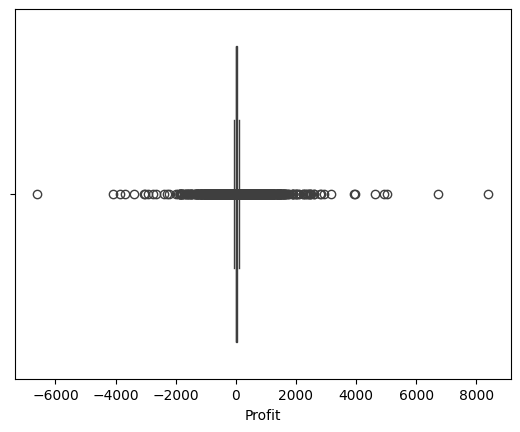

In [ ]:
sns.boxplot(x = df['Profit'])
plt.show()

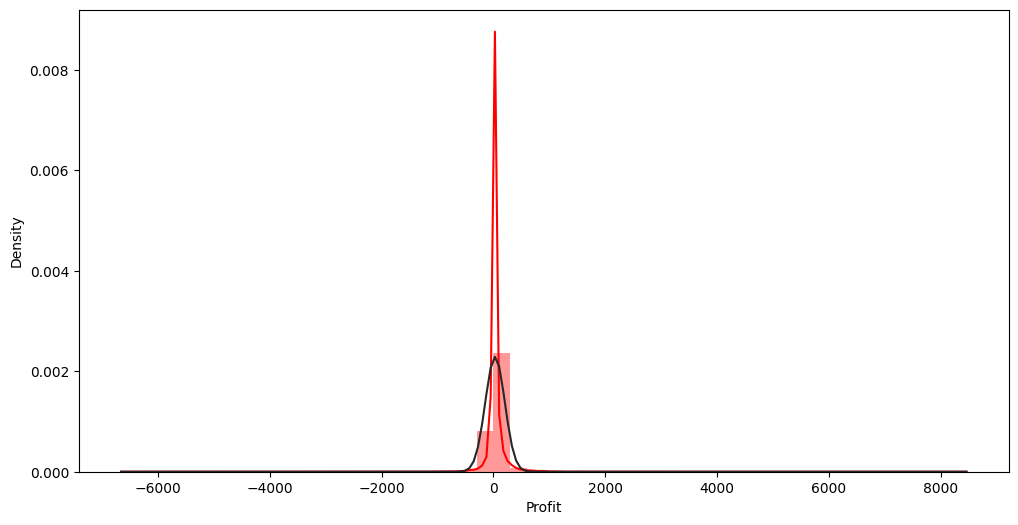

In [ ]:
#Plot and check the distribution
plt.figure(figsize=(12,6))
sns.distplot(df['Profit'],fit=norm, color ="r")
plt.show()

In [ ]:
print("Skew of raw data: %f" % df['Profit'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['Profit'],fisher = False))

Skew of raw data: 4.157095
Kurtosis of raw data: 294.371518


In [ ]:
df = df[df['Profit'] != 0]

Skew after Log Transformation: -0.033945
Kurtosis after Log Transformation: nan


count    38076.000000
mean         2.948666
std          1.576004
min         -3.324236
25%          1.879312
50%          2.921009
75%          4.030712
max          9.035984
Name: Log_Profit, dtype: float64

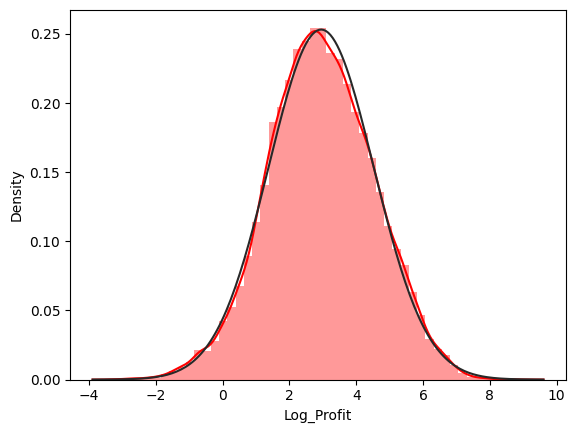

In [ ]:
#log transformation
df['Log_Profit'] = np.log(df['Profit'])

#print(df['Shipping Cost'])
#print(df['Log_Shipping Cost'])
#check distribution,skewness and kurtosis
sns.distplot(df['Log_Profit'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df['Log_Profit'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df['Log_Profit'],fisher = False))
df['Log_Profit'].describe()

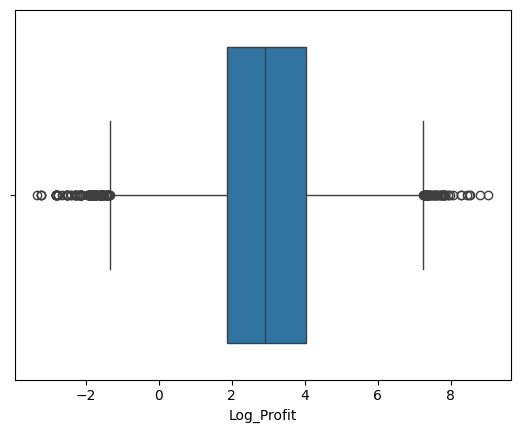

In [ ]:
sns.boxplot(x = df['Log_Profit'])
plt.show()

In [ ]:
df_encoded=df.copy()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50620 entries, 0 to 51287
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           50620 non-null  object 
 1   Order Date         50620 non-null  object 
 2   Ship Date          50620 non-null  object 
 3   Ship Mode          50620 non-null  object 
 4   Customer ID        50620 non-null  object 
 5   Customer Name      50620 non-null  object 
 6   Segment            50620 non-null  object 
 7   City               50620 non-null  object 
 8   State              50620 non-null  object 
 9   Country            50620 non-null  object 
 10  Market             50620 non-null  object 
 11  Region             50620 non-null  object 
 12  Product ID         50620 non-null  object 
 13  Category           50620 non-null  object 
 14  Sub-Category       50620 non-null  object 
 15  Product Name       50620 non-null  object 
 16  Sales              50620 no

In [ ]:
df_encoded.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Log_Shipping Cost', 'Log_Sales', 'Log_Profit'],
      dtype='object')

In [ ]:
drop_cols=['Order ID',
       'Customer Name', 'Product ID']

In [ ]:
df['Product Name'].nunique()

3786

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [ ]:
df.drop(drop_cols,inplace=True,axis=1)

In [ ]:
b = list(df["Product Name"].unique())
a = []
for i in range(0,len(b)):
    a.append(i)
df['Product Name'].replace(b,a, inplace=True)

In [ ]:
df['Product Name']

0           0
1           1
2           2
3           3
4           4
         ... 
51283    2829
51284    2393
51285    2260
51286    3762
51287    3363
Name: Product Name, Length: 50620, dtype: int64

In [ ]:
df_encoded=df.copy()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50620 entries, 0 to 51287
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         50620 non-null  datetime64[ns]
 1   Ship Date          50620 non-null  datetime64[ns]
 2   Ship Mode          50620 non-null  object        
 3   Customer ID        50620 non-null  object        
 4   Segment            50620 non-null  object        
 5   City               50620 non-null  object        
 6   State              50620 non-null  object        
 7   Country            50620 non-null  object        
 8   Market             50620 non-null  object        
 9   Region             50620 non-null  object        
 10  Category           50620 non-null  object        
 11  Sub-Category       50620 non-null  object        
 12  Product Name       50620 non-null  int64         
 13  Sales              50620 non-null  float64       
 14  Quantity   

In [ ]:
df_encoded.drop('Customer ID',inplace=True,axis=1)

In [ ]:
df_encoded.City.nunique()

3631

In [ ]:
df_encoded.drop('City',inplace=True,axis=1)

In [ ]:
df_encoded.drop('State',inplace=True,axis=1)

In [ ]:
df_encoded['Sub-Category'].nunique()

17

In [ ]:
df_encoded['Log_Profit'].isnull().sum()

12544

In [ ]:
df_encoded['Log_Profit'].fillna(df_encoded['Log_Profit'].mean(),inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50620 entries, 0 to 51287
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         50620 non-null  datetime64[ns]
 1   Ship Date          50620 non-null  datetime64[ns]
 2   Ship Mode          50620 non-null  object        
 3   Segment            50620 non-null  object        
 4   Country            50620 non-null  object        
 5   Market             50620 non-null  object        
 6   Region             50620 non-null  object        
 7   Category           50620 non-null  object        
 8   Sub-Category       50620 non-null  object        
 9   Product Name       50620 non-null  int64         
 10  Sales              50620 non-null  float64       
 11  Quantity           50620 non-null  int64         
 12  Discount           50620 non-null  float64       
 13  Profit             50620 non-null  float64       
 14  Shipping Co

In [ ]:
data_dummy = pd.get_dummies(df_encoded[['Category','Market','Region','Ship Mode','Segment','Country','Sub-Category','Order Priority']],drop_first = True,dtype= np.uint8)

In [ ]:
data_dummy

,Category_Office Supplies,Category_Technology,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Region_Canada,Region_Caribbean,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
51284,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51285,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51286,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = df_encoded.drop(['Category','Market','Region','Ship Mode','Segment','Country','Sub-Category','Order Priority'],axis=1)
x

,Order Date,Ship Date,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Log_Shipping Cost,Log_Sales,Log_Profit
0,2012-07-31,2012-07-31,0,2309.650,7,0.0,762.1845,933.57,6.839016,7.744851,6.636189
1,2013-02-05,2013-02-07,1,3709.395,9,0.1,-288.7650,923.63,6.828312,8.218624,2.948666
2,2013-10-17,2013-10-18,2,5175.171,9,0.1,919.9710,915.49,6.819459,8.551628,6.824342
3,2013-01-28,2013-01-30,3,2892.510,5,0.1,-96.5400,910.16,6.813620,7.969880,2.948666
4,2013-11-05,2013-11-06,4,2832.960,8,0.0,311.5200,903.04,6.805767,7.949077,5.741464
...,...,...,...,...,...,...,...,...,...,...,...
51283,2014-05-30,2014-05-30,2829,26.940,2,0.0,1.8600,0.01,-4.605170,3.293612,0.620576
51284,2014-08-05,2014-08-10,2393,58.050,5,0.1,19.9500,0.01,-4.605170,4.061305,2.993229
51285,2014-06-19,2014-06-19,2260,65.100,5,0.0,4.5000,0.01,-4.605170,4.175925,1.504077
51286,2014-06-20,2014-06-24,3762,0.444,1,0.8,-1.1100,0.01,-4.605170,-0.811931,2.948666


In [ ]:
df_encoded = x.join(data_dummy)


In [ ]:
df_encoded

,Order Date,Ship Date,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Log_Shipping Cost,Log_Sales,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2012-07-31,2012-07-31,0,2309.650,7,0.0,762.1845,933.57,6.839016,7.744851,...,0,0,0,0,0,0,0,0,0,0
1,2013-02-05,2013-02-07,1,3709.395,9,0.1,-288.7650,923.63,6.828312,8.218624,...,0,0,0,0,0,0,0,0,0,0
2,2013-10-17,2013-10-18,2,5175.171,9,0.1,919.9710,915.49,6.819459,8.551628,...,0,0,0,1,0,0,0,0,0,1
3,2013-01-28,2013-01-30,3,2892.510,5,0.1,-96.5400,910.16,6.813620,7.969880,...,0,0,0,1,0,0,0,0,0,1
4,2013-11-05,2013-11-06,4,2832.960,8,0.0,311.5200,903.04,6.805767,7.949077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2014-05-30,2014-05-30,2829,26.940,2,0.0,1.8600,0.01,-4.605170,3.293612,...,0,0,1,0,0,0,0,1,0,0
51284,2014-08-05,2014-08-10,2393,58.050,5,0.1,19.9500,0.01,-4.605170,4.061305,...,0,0,0,0,0,0,0,0,0,1
51285,2014-06-19,2014-06-19,2260,65.100,5,0.0,4.5000,0.01,-4.605170,4.175925,...,0,0,0,0,0,0,0,0,0,1
51286,2014-06-20,2014-06-24,3762,0.444,1,0.8,-1.1100,0.01,-4.605170,-0.811931,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50620 entries, 0 to 51287
Columns: 201 entries, Order Date to Order Priority_Medium
dtypes: datetime64[ns](2), float64(7), int64(2), uint8(190)
memory usage: 15.8 MB


In [ ]:
cor_matrix = df_encoded.corr().abs()

In [ ]:
cor_matrix

,Order Date,Ship Date,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Log_Shipping Cost,Log_Sales,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
Order Date,1.000000,0.999991,0.003341,0.002296,0.000413,0.005839,0.002574,0.002159,0.003019,0.000140,...,0.002355,0.003045,0.000185,0.007072,0.003103,0.001887,0.002093,0.013116,0.003713,0.013990
Ship Date,0.999991,1.000000,0.003262,0.002316,0.000431,0.005846,0.002581,0.002757,0.003685,0.000148,...,0.002352,0.003027,0.000122,0.007077,0.003109,0.001909,0.002079,0.014521,0.005065,0.015530
Product Name,0.003341,0.003262,1.000000,0.503896,0.010062,0.002825,0.159036,0.472100,0.734156,0.794219,...,0.267832,0.132734,0.188771,0.208505,0.096116,0.063317,0.132857,0.002543,0.001362,0.017015
Sales,0.002296,0.002316,0.503896,1.000000,0.313750,0.087859,0.486488,0.768184,0.601601,0.674165,...,0.103312,0.098064,0.099028,0.142701,0.015694,0.066897,0.169692,0.001279,0.005469,0.002060
Quantity,0.000413,0.000431,0.010062,0.313750,1.000000,0.020767,0.105080,0.273378,0.363518,0.403275,...,0.010512,0.013451,0.017780,0.006844,0.018370,0.004434,0.005774,0.003224,0.005117,0.003325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Category_Supplies,0.001887,0.001909,0.063317,0.066897,0.004434,0.015866,0.024875,0.062882,0.052315,0.057637,...,0.051562,0.038619,0.060776,0.059318,0.073514,1.000000,0.029247,0.002518,0.004987,0.000775
Sub-Category_Tables,0.002093,0.002079,0.132857,0.169692,0.005774,0.090431,0.077629,0.152063,0.155707,0.172553,...,0.030326,0.022713,0.035745,0.034887,0.043236,0.029247,1.000000,0.007757,0.000878,0.007793
Order Priority_High,0.013116,0.014521,0.002543,0.001279,0.003224,0.001602,0.005477,0.074336,0.126038,0.000095,...,0.002350,0.003757,0.007655,0.001539,0.001168,0.002518,0.007757,1.000000,0.145928,0.763879
Order Priority_Low,0.003713,0.005065,0.001362,0.005469,0.005117,0.000172,0.005471,0.002857,0.025074,0.002769,...,0.000559,0.000691,0.009355,0.005314,0.002794,0.004987,0.000878,0.145928,1.000000,0.258032


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [ ]:
upper_tri

,Order Date,Ship Date,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Log_Shipping Cost,Log_Sales,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
Order Date,NaN,0.999991,0.003341,0.002296,0.000413,0.005839,0.002574,0.002159,0.003019,0.000140,...,0.002355,0.003045,0.000185,0.007072,0.003103,0.001887,0.002093,0.013116,0.003713,0.013990
Ship Date,NaN,NaN,0.003262,0.002316,0.000431,0.005846,0.002581,0.002757,0.003685,0.000148,...,0.002352,0.003027,0.000122,0.007077,0.003109,0.001909,0.002079,0.014521,0.005065,0.015530
Product Name,NaN,NaN,NaN,0.503896,0.010062,0.002825,0.159036,0.472100,0.734156,0.794219,...,0.267832,0.132734,0.188771,0.208505,0.096116,0.063317,0.132857,0.002543,0.001362,0.017015
Sales,NaN,NaN,NaN,NaN,0.313750,0.087859,0.486488,0.768184,0.601601,0.674165,...,0.103312,0.098064,0.099028,0.142701,0.015694,0.066897,0.169692,0.001279,0.005469,0.002060
Quantity,NaN,NaN,NaN,NaN,NaN,0.020767,0.105080,0.273378,0.363518,0.403275,...,0.010512,0.013451,0.017780,0.006844,0.018370,0.004434,0.005774,0.003224,0.005117,0.003325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Category_Supplies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.029247,0.002518,0.004987,0.000775
Sub-Category_Tables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007757,0.000878,0.007793
Order Priority_High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145928,0.763879
Order Priority_Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258032


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print(); print(to_drop)


['Ship Date', 'Shipping Cost', 'Log_Shipping Cost', 'Log_Sales', 'Log_Profit', 'Category_Technology', 'Region_Canada', 'Region_EMEA', 'Ship Mode_Standard Class', 'Country_Australia', 'Country_Canada', 'Country_China', 'Country_Cuba', 'Country_Dominican Republic', 'Country_India', 'Country_Indonesia', 'Country_Mexico', 'Country_United States', 'Order Priority_Medium']


In [ ]:
to_drop.remove('Log_Sales')

In [ ]:
to_drop.remove('Log_Profit')

In [ ]:
to_drop.remove('Log_Shipping Cost')

In [ ]:
to_drop

['Ship Date',
 'Shipping Cost',
 'Category_Technology',
 'Region_Canada',
 'Region_EMEA',
 'Ship Mode_Standard Class',
 'Country_Australia',
 'Country_Canada',
 'Country_China',
 'Country_Cuba',
 'Country_Dominican Republic',
 'Country_India',
 'Country_Indonesia',
 'Country_Mexico',
 'Country_United States',
 'Order Priority_Medium']

In [ ]:
df_encoded = df_encoded.drop(to_drop, axis=1)
print(); print(df_encoded.head())


  Order Date  Product Name     Sales  Quantity  Discount    Profit  \
0 2012-07-31             0  2309.650         7       0.0  762.1845   
1 2013-02-05             1  3709.395         9       0.1 -288.7650   
2 2013-10-17             2  5175.171         9       0.1  919.9710   
3 2013-01-28             3  2892.510         5       0.1  -96.5400   
4 2013-11-05             4  2832.960         8       0.0  311.5200   

   Log_Shipping Cost  Log_Sales  Log_Profit  Category_Office Supplies  ...  \
0           6.839016   7.744851    6.636189                         0  ...   
1           6.828312   8.218624    2.948666                         0  ...   
2           6.819459   8.551628    6.824342                         0  ...   
3           6.813620   7.969880    2.948666                         0  ...   
4           6.805767   7.949077    5.741464                         0  ...   

   Sub-Category_Furnishings  Sub-Category_Labels  Sub-Category_Machines  \
0                         0       

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] < -0.60)]
print(); print(to_drop)


[]


In [ ]:
df_encoded.columns

Index(['Order Date', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Log_Shipping Cost', 'Log_Sales', 'Log_Profit',
       'Category_Office Supplies',
       ...
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Order Priority_High', 'Order Priority_Low'],
      dtype='object', length=185)

In [ ]:
df_encoded

,Order Date,Product Name,Sales,Quantity,Discount,Profit,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
0,2012-07-31,0,2309.650,7,0.0,762.1845,6.839016,7.744851,6.636189,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-02-05,1,3709.395,9,0.1,-288.7650,6.828312,8.218624,2.948666,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-10-17,2,5175.171,9,0.1,919.9710,6.819459,8.551628,6.824342,0,...,0,0,0,0,1,0,0,0,0,0
3,2013-01-28,3,2892.510,5,0.1,-96.5400,6.813620,7.969880,2.948666,0,...,0,0,0,0,1,0,0,0,0,0
4,2013-11-05,4,2832.960,8,0.0,311.5200,6.805767,7.949077,5.741464,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2014-05-30,2829,26.940,2,0.0,1.8600,-4.605170,3.293612,0.620576,1,...,0,0,0,1,0,0,0,0,1,0
51284,2014-08-05,2393,58.050,5,0.1,19.9500,-4.605170,4.061305,2.993229,1,...,0,0,0,0,0,0,0,0,0,0
51285,2014-06-19,2260,65.100,5,0.0,4.5000,-4.605170,4.175925,1.504077,1,...,0,0,0,0,0,0,0,0,0,0
51286,2014-06-20,3762,0.444,1,0.8,-1.1100,-4.605170,-0.811931,2.948666,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.drop(['Order Date'],inplace=True,axis=1)

In [ ]:
df_main = df_encoded

In [ ]:
df_main.drop(['Sales','Profit'],inplace=True,axis=1)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_main, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
15965,1780,9,0.0,2.890372,6.124924,4.084294,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46250,2449,1,0.0,0.019803,3.802654,1.272566,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
28490,1439,2,0.0,1.827770,4.258163,1.444563,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35626,2353,1,0.1,1.223775,2.699816,0.898941,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22554,796,2,0.4,2.309561,5.071693,2.948666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16533,1664,2,0.1,2.835564,5.294611,3.566712,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
79,43,5,0.0,6.351357,7.741099,4.521245,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12283,535,1,0.0,3.250762,5.254836,3.868071,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14345,840,2,0.2,3.044522,5.306206,3.003621,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')


num_vars = df_encoded.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
15965,0.098036,2.422658,-0.675163,0.510546,1.129242,0.831280,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46250,0.784401,-1.090105,-0.675163,-1.289269,-0.466552,-1.228936,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
28490,-0.251816,-0.651010,-0.675163,-0.155693,-0.153540,-1.102910,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35626,0.685909,-1.090105,-0.204659,-0.534391,-1.224389,-1.502699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22554,-0.911507,-0.651010,1.206852,0.146384,0.405493,-0.000820,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2697,-1.211086,1.544467,-0.675163,1.630874,1.595466,0.874394,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15093,0.150359,-0.651010,-0.675163,0.562658,-0.379408,-1.049597,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2689,-1.320864,1.105372,-0.675163,1.631982,1.990779,-0.137200,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10677,-1.340357,-1.090105,-0.675163,0.840163,1.182880,1.306820,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40297,-0.852001,-1.090105,0.265844,-0.815939,-0.534639,-0.000820,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train = df_train.pop('Log_Sales')
X_train = df_train

In [ ]:
X_train

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,Market_EU,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
15965,0.098036,2.422658,-0.675163,0.510546,0.831280,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46250,0.784401,-1.090105,-0.675163,-1.289269,-1.228936,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
28490,-0.251816,-0.651010,-0.675163,-0.155693,-1.102910,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35626,0.685909,-1.090105,-0.204659,-0.534391,-1.502699,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22554,-0.911507,-0.651010,1.206852,0.146384,-0.000820,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16533,-0.020976,-0.651010,-0.204659,0.476182,0.452036,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
79,-1.684053,0.666276,-0.675163,2.680544,1.151443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12283,-1.179282,-1.090105,-0.675163,0.736506,0.672848,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14345,-0.866365,-0.651010,0.265844,0.607197,0.039447,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train

15965    1.129242
46250   -0.466552
28490   -0.153540
35626   -1.224389
22554    0.405493
           ...   
16533    0.558675
79       2.239828
12283    0.531343
14345    0.566643
38949   -0.357085
Name: Log_Sales, Length: 35434, dtype: float64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35434 entries, 15965 to 38949
Columns: 181 entries, Product Name to Order Priority_Low
dtypes: float64(5), uint8(176)
memory usage: 7.6 MB


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

#first model
lm = sm.OLS(y_train,X_train).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     2767.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:04:05   Log-Likelihood:                -2710.4
No. Observations:               35434   AIC:                             5771.
Df Residuals:                   35259   BIC:                             7254.
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

**RFE**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#trained dummy model
lm = LinearRegression()
lm.fit(X_train, y_train)

#feature selection first
rfe = RFE(lm,n_features_to_select=14)
# running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Category_Office Supplies', 'Region_North Asia', 'Country_Finland',
       'Country_Norway', 'Country_United Kingdom', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Labels', 'Sub-Category_Paper',
       'Sub-Category_Storage', 'Sub-Category_Supplies'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['const', 'Product Name', 'Quantity', 'Discount', 'Log_Shipping Cost',
       'Log_Profit', 'Market_Africa', 'Market_Canada', 'Market_EMEA',
       'Market_EU',
       ...
       'Country_Zimbabwe', 'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Copiers', 'Sub-Category_Furnishings',
       'Sub-Category_Machines', 'Sub-Category_Phones', 'Sub-Category_Tables',
       'Order Priority_High', 'Order Priority_Low'],
      dtype='object', length=168)

In [ ]:
col = col.tolist()
col.extend(["Product Name","Quantity","Discount","Log_Shipping Cost","Log_Profit"])

In [ ]:
col

['Category_Office Supplies',
 'Region_North Asia',
 'Country_Finland',
 'Country_Norway',
 'Country_United Kingdom',
 'Sub-Category_Appliances',
 'Sub-Category_Art',
 'Sub-Category_Binders',
 'Sub-Category_Envelopes',
 'Sub-Category_Fasteners',
 'Sub-Category_Labels',
 'Sub-Category_Paper',
 'Sub-Category_Storage',
 'Sub-Category_Supplies',
 'Product Name',
 'Quantity',
 'Discount',
 'Log_Shipping Cost',
 'Log_Profit']

In [ ]:
X_train_rfe = X_train[col]

import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#main model 1 based on RFE
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:05:20   Log-Likelihood:                -5948.4
No. Observations:               35434   AIC:                         1.193e+04
Df Residuals:                   35415   BIC:                         1.210e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Sub-Category_Fasteners,inf
11,Sub-Category_Labels,inf
14,Sub-Category_Supplies,inf
13,Sub-Category_Storage,inf
12,Sub-Category_Paper,inf
6,Sub-Category_Appliances,inf
7,Sub-Category_Art,inf
8,Sub-Category_Binders,inf
9,Sub-Category_Envelopes,inf
1,Category_Office Supplies,inf


In [ ]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)
X_train_new = X_train_new.drop(["Sub-Category_Supplies"], axis = 1)

import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:05:21   Log-Likelihood:                -5948.4
No. Observations:               35434   AIC:                         1.193e+04
Df Residuals:                   35415   BIC:                         1.210e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Category_Office Supplies,5.98
17,Log_Shipping Cost,3.76
0,const,3.45
14,Product Name,3.26
8,Sub-Category_Binders,3.16
13,Sub-Category_Storage,2.78
7,Sub-Category_Art,2.70
12,Sub-Category_Paper,2.32
11,Sub-Category_Labels,2.02
18,Log_Profit,1.91


Text(0.5, 0, 'Errors')

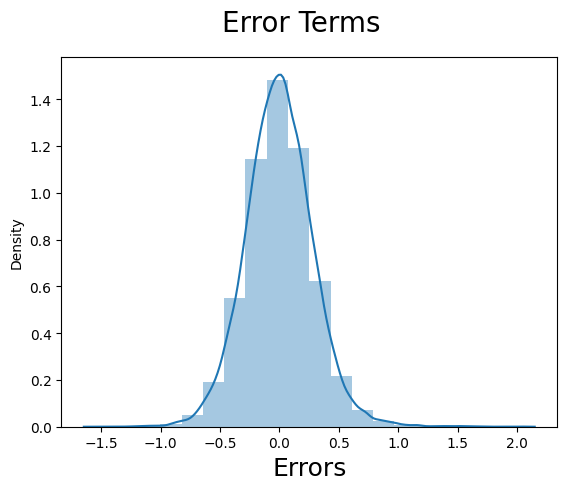

In [ ]:
y_train_price = lm.predict(X_train_new)

#evaluation of the prediction
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [ ]:
num_vars = df_encoded.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head(10)

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
44537,0.079165,-1.080436,-0.683185,-1.112297,-1.057616,-0.580784,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26277,-1.198103,-1.080436,1.195645,-0.040060,-0.370338,0.001904,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23165,0.334414,-0.641815,-0.683185,0.117625,0.033105,-1.201920,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10286,-1.347168,-0.641815,1.186297,0.864283,0.900793,0.001904,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2501,-0.832586,0.674049,-0.215815,1.655763,0.954122,-0.346298,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
18833,-1.455394,-0.641815,0.260903,0.348220,0.566356,0.632643,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10205,-0.556916,1.989912,0.952612,0.871097,1.343889,0.001904,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25889,1.350306,0.674049,-0.683185,-0.021062,-0.450608,0.034393,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
38238,1.519792,-0.641815,-0.683185,-0.674473,-0.624079,-0.254167,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49298,1.508561,-0.641815,-0.683185,-1.715651,-1.063100,-0.569502,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y_test = df_test.pop('Log_Sales')
X_test = df_test

In [ ]:
X_test = sm.add_constant(X_test)

X_test_new = X_test[X_train_new.columns]

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

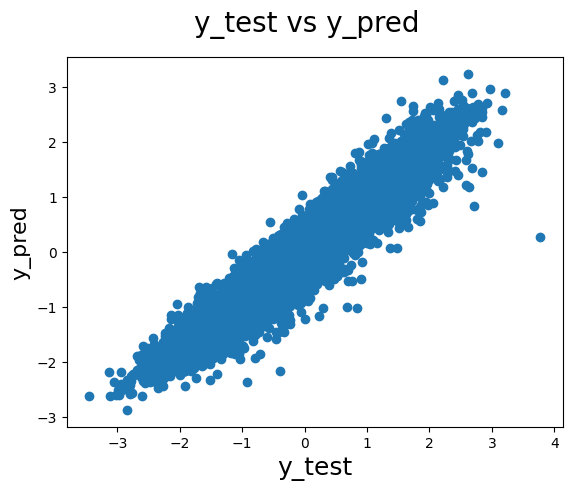

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

<Axes: xlabel='Log_Sales'>

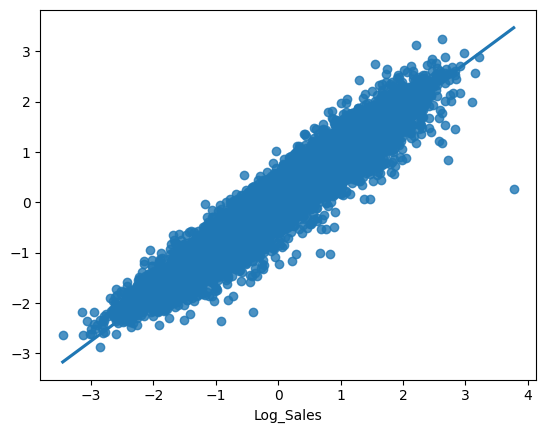

In [ ]:
import seaborn as sns

sns.regplot(x= y_test,y = y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9198118152507054

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Absolute Error: 0.21724751422533375
Mean Squared Error: 0.08018818474929457
R-squared: 0.9198118152507054


In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:05:26   Log-Likelihood:                -5948.4
No. Observations:               35434   AIC:                         1.193e+04
Df Residuals:                   35415   BIC:                         1.210e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Ridge Regularization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)


#for implementing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# for hiding warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_main, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')


num_vars = df_encoded.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Region_Caribbean,Region_Central,Region_Central Asia,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Ship Mode_Same Day,Ship Mode_Second Class,Segment_Corporate,Segment_Home Office,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Czech Republic,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Guadeloupe,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Mali,Country_Martinique,Country_Mauritania,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar (Burma),Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
15965,0.098036,2.422658,-0.675163,0.510546,1.129242,0.831280,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46250,0.784401,-1.090105,-0.675163,-1.289269,-0.466552,-1.228936,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [ ]:
y_train = df_train.pop('Log_Sales')
X_train = df_train

In [ ]:
#alpha values
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,17.1,17.3,17.5,17.7,17.9,18.1,18.3,18.5,18.7,18.9,20,30,40,50,100,500,1000]}

#applying ridge
ridge = Ridge()

# cross validation
folds = 4

#grid search
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

#fitting model for each value
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 17.1, 17.3,
                                   17.5, 17.7, 17.9, 18.1, 18.3, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
#printing best alpha value and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 18.5}
0.9311056684390353


In [ ]:
# #alpha values
# params = {'alpha' : [17.1,17.3,17.5,17.7,17.9,18.1,18.3,18.5,18.7,18.9]}

# #applying ridge
# ridge = Ridge()

# # cross validation
# folds = 4

# #grid search
# model_cv = GridSearchCV(estimator = ridge,
#                        param_grid = params,
#                        scoring = 'r2',
#                        cv = folds,
#                        return_train_score = True,
#                        verbose = 1)

# #fitting model for each value
# model_cv.fit(X_train,y_train)

In [ ]:
#printing best alpha value and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 18.5}
0.9311056684390353


In [ ]:
#checking the results at all iterations
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.148391,0.023658,0.016382,0.003962,0.001,{'alpha': 0.001},0.930317,0.930362,0.929663,0.933575,0.930980,0.001524,36,0.932112,0.932082,0.932310,0.931002,0.931876,0.000512
1,0.152335,0.014079,0.011799,0.004089,0.001,{'alpha': 0.001},0.930317,0.930362,0.929663,0.933575,0.930980,0.001524,36,0.932112,0.932082,0.932310,0.931002,0.931876,0.000512
2,0.177835,0.005427,0.016111,0.003802,0.01,{'alpha': 0.01},0.930318,0.930363,0.929667,0.933576,0.930981,0.001523,35,0.932112,0.932082,0.932309,0.931002,0.931876,0.000512
3,0.154420,0.014208,0.016869,0.004054,0.05,{'alpha': 0.05},0.930320,0.930363,0.929672,0.933579,0.930983,0.001523,34,0.932112,0.932082,0.932309,0.931001,0.931876,0.000512
4,0.171336,0.020539,0.018041,0.000273,0.1,{'alpha': 0.1},0.930322,0.930362,0.929676,0.933583,0.930986,0.001524,33,0.932112,0.932081,0.932309,0.931001,0.931876,0.000512
5,0.155740,0.012353,0.013425,0.004317,0.2,{'alpha': 0.2},0.930327,0.930362,0.929684,0.933589,0.930990,0.001525,32,0.932112,0.932081,0.932308,0.931000,0.931875,0.000513
6,0.159072,0.015422,0.015901,0.004001,0.3,{'alpha': 0.3},0.930331,0.930361,0.929691,0.933595,0.930995,0.001525,31,0.932111,0.932081,0.932308,0.931000,0.931875,0.000513
7,0.178422,0.007888,0.013943,0.004381,0.4,{'alpha': 0.4},0.930336,0.930361,0.929697,0.933600,0.930998,0.001525,30,0.932111,0.932080,0.932307,0.930999,0.931874,0.000513
8,0.158739,0.011537,0.016193,0.004075,0.5,{'alpha': 0.5},0.930340,0.930360,0.929703,0.933604,0.931002,0.001525,29,0.932110,0.932080,0.932306,0.930998,0.931873,0.000513
9,0.153670,0.009358,0.011776,0.003135,0.6,{'alpha': 0.6},0.930344,0.930359,0.929708,0.933608,0.931005,0.001525,28,0.932109,0.932079,0.932305,0.930997,0.931873,0.000513


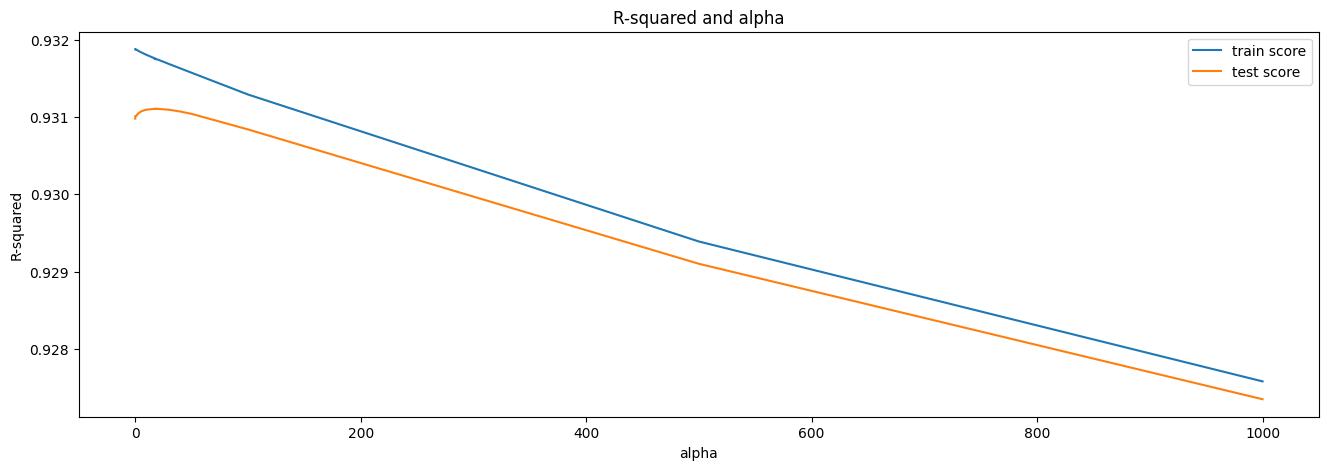

In [ ]:
#plotting graph for score and alpha values
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
#training model on the alpha value as 2.7
alpha = 18.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
#printing coef. at 2.7
ridge.coef_

array([-3.41930775e-01,  2.10405011e-01, -1.16229868e-01,  3.94576492e-01,
        1.10901823e-01, -1.03285888e-01, -5.57307417e-02, -1.75946286e-02,
       -7.24458471e-02,  4.16724640e-02, -9.65251624e-02,  2.64687496e-02,
       -9.31368195e-03, -1.53218389e-02,  3.35954770e-02, -2.35554379e-03,
       -3.49042746e-03,  2.49339592e-02,  6.00613534e-02, -1.10541933e-02,
        5.55643765e-02,  1.31517366e-02, -1.26780279e-01, -5.28719185e-02,
       -6.74642447e-06, -8.45629615e-04, -1.05274985e-02,  2.66823227e-02,
        1.27685201e-02,  1.86392546e-02,  7.67730418e-03,  8.65038294e-03,
        1.17030186e-02,  0.00000000e+00, -2.87418165e-02,  1.86957971e-02,
       -3.58758696e-02, -1.24905158e-03,  1.67458018e-02,  4.95833044e-05,
        3.11869437e-02, -6.87670352e-03, -3.88249469e-02, -1.17173717e-04,
       -7.52334650e-02, -3.41334408e-03, -6.64303457e-03, -1.69526086e-02,
       -2.72935925e-03, -2.63292547e-02,  5.88601231e-03, -8.55902903e-03,
       -2.60351575e-02, -

In [ ]:
num_vars = df_encoded.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head(10)

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Sales,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Region_Caribbean,Region_Central,Region_Central Asia,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Ship Mode_Same Day,Ship Mode_Second Class,Segment_Corporate,Segment_Home Office,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Czech Republic,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Guadeloupe,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Mali,Country_Martinique,Country_Mauritania,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar (Burma),Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
44537,0.079165,-1.080436,-0.683185,-1.112297,-1.057616,-0.580784,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26277,-1.198103,-1.080436,1.195645,-0.040060,-0.370338,0.001904,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [ ]:
y_test = df_test.pop('Log_Sales')
X_test = df_test

In [ ]:
# predicting y on the X_test and printing accuracy score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.9330878376682731


In [ ]:
#list of alpha for tuning
params = {'alpha' : [0.00001,0.0001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

#lasso object
lasso = Lasso()

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 4 folds for each of 31 candidates, totalling 124 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   30, 40, 50, 100, 500, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
#printing best alpha value and best score
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.0001}
0.9311365071916453


In [ ]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,5.647359,0.940988,0.013698,0.007539,0.00001,{'alpha': 1e-05},0.930425,0.930355,0.929771,0.933669,0.931055,0.001530,2,0.932089,0.932059,0.932282,0.930970,0.931850,0.000515
1,0.446526,0.042780,0.010297,0.001623,0.0001,{'alpha': 0.0001},0.930692,0.930214,0.929819,0.933821,0.931137,0.001580,1,0.931756,0.931817,0.931995,0.930681,0.931562,0.000516
2,0.232205,0.012665,0.009188,0.000230,0.001,{'alpha': 0.001},0.929921,0.928975,0.928654,0.933084,0.930158,0.001752,3,0.930550,0.930693,0.930866,0.929468,0.930394,0.000546
3,0.189146,0.009792,0.011726,0.004452,0.01,{'alpha': 0.01},0.916736,0.915775,0.915075,0.920818,0.917101,0.002226,4,0.917233,0.917679,0.917798,0.916058,0.917192,0.000688
4,0.189138,0.011338,0.010146,0.001742,0.05,{'alpha': 0.05},0.899782,0.898346,0.898859,0.904640,0.900407,0.002498,5,0.900704,0.900793,0.901279,0.899183,0.900490,0.000785
5,0.177852,0.010752,0.010557,0.002300,0.1,{'alpha': 0.1},0.876277,0.873838,0.875963,0.881322,0.876850,0.002747,6,0.877321,0.877544,0.877634,0.875226,0.876931,0.000991
6,0.160472,0.006104,0.010320,0.001539,0.2,{'alpha': 0.2},0.823563,0.821155,0.823558,0.827147,0.823856,0.002139,7,0.824381,0.825352,0.824371,0.821668,0.823943,0.001373
7,0.167005,0.007961,0.010187,0.001629,0.3,{'alpha': 0.3},0.758377,0.756755,0.758275,0.760233,0.758410,0.001233,8,0.758825,0.760167,0.759011,0.756080,0.758521,0.001500
8,0.210098,0.073700,0.014039,0.007712,0.4,{'alpha': 0.4},0.676955,0.675240,0.675543,0.675920,0.675915,0.000647,9,0.676691,0.677746,0.676515,0.673217,0.676042,0.001698
9,0.205955,0.015599,0.024123,0.003034,0.5,{'alpha': 0.5},0.576733,0.576058,0.575472,0.574720,0.575746,0.000741,10,0.575907,0.577621,0.576709,0.573362,0.575900,0.001586


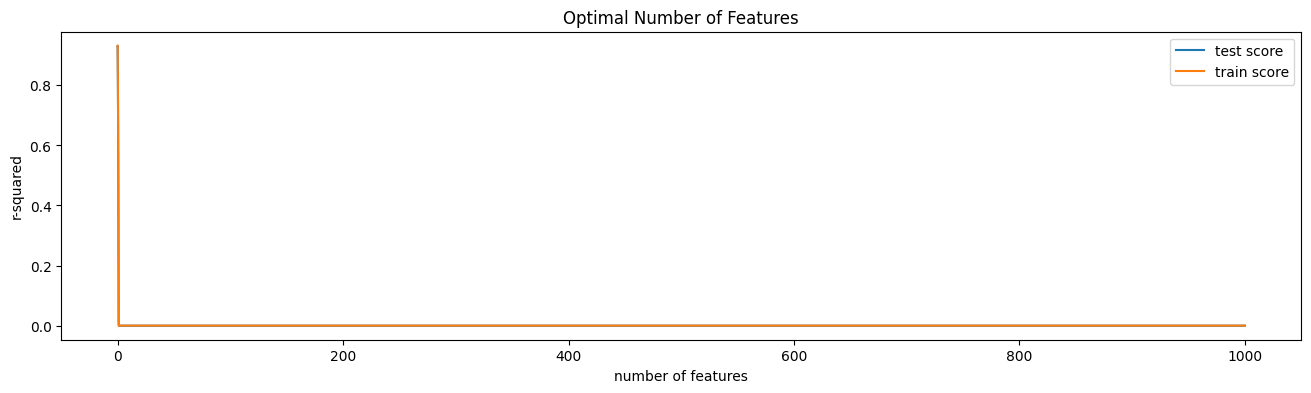

In [ ]:
#plot between alpha values and score
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [ ]:
#taking the best alpha value
alpha = 0.0001
lasso = Lasso(alpha=alpha)

#fitting in model
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [ ]:
#predicting the values of y
y_test_pred = lasso.predict(X_test)

#printing accuracy score
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9330916007739516


In [ ]:
#saving coef. of ridge and lasso in every column and saving in DataFrame
coef = pd.DataFrame(index = X_train.columns)
coef.rows = X_train.columns
coef["ridge"] = ridge.coef_
coef["lasso"] = lasso.coef_
c= coef.transpose()

In [ ]:
coef

,ridge,lasso
Product Name,-0.341931,-0.342408
Quantity,0.210405,0.210589
Discount,-0.116230,-0.117443
Log_Shipping Cost,0.394576,0.395193
Log_Profit,0.110902,0.110175
...,...,...
Sub-Category_Storage,0.083455,0.099553
Sub-Category_Supplies,0.012983,0.028427
Sub-Category_Tables,0.454901,0.465767
Order Priority_High,-0.106231,-0.106067


In [ ]:
c

,Product Name,Quantity,Discount,Log_Shipping Cost,Log_Profit,Category_Office Supplies,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Region_Caribbean,Region_Central,Region_Central Asia,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Ship Mode_Same Day,Ship Mode_Second Class,Segment_Corporate,Segment_Home Office,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Czech Republic,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Guadeloupe,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Mali,Country_Martinique,Country_Mauritania,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar (Burma),Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low
ridge,-0.341931,0.210405,-0.116230,0.394576,0.110902,-0.103286,-0.055731,-0.017595,-0.072446,0.041672,-0.096525,0.026469,-0.009314,-0.015322,0.033595,-0.002356,-0.00349,0.024934,0.060061,-0.011054,0.055564,0.013152,-0.126780,-0.052872,-0.000007,-0.000846,-0.010527,0.026682,0.012769,0.018639,0.007677,0.00865,0.011703,0.0,-0.028742,0.018696,-0.035876,-0.001249,0.016746,0.00005,0.031187,-0.006877,-0.038825,-0.000117,-0.075233,-0.003413,-0.006643,-0.016953,-0.002729,-0.026329,0.005886,-0.008559,-0.026035,-0.007668,0.044796,0.000188,-0.017266,0.020154,0.000431,0.0,0.017394,0.038126,-0.002286,0.021135,0.026115,0.035827,-0.022167,0.011853,0.014164,-0.016864,0.002872,0.030865,0.015946,-0.020684,0.001522,-0.002781,0.050106,0.016892,0.027806,0.019097,0.049617,0.010485,-0.001067,0.022709,0.038031,-0.120136,0.03046,0.026287,-0.02

In [ ]:
#saving coef. which are having value less than 0 and more than 0
# for feature selection
coef = coef.loc[(coef.lasso < 0) | (coef.lasso > 0)]

In [ ]:
coef

,ridge,lasso
Product Name,-0.341931,-0.342408
Quantity,0.210405,0.210589
Discount,-0.116230,-0.117443
Log_Shipping Cost,0.394576,0.395193
Log_Profit,0.110902,0.110175
...,...,...
Sub-Category_Storage,0.083455,0.099553
Sub-Category_Supplies,0.012983,0.028427
Sub-Category_Tables,0.454901,0.465767
Order Priority_High,-0.106231,-0.106067


In [ ]:
coef = coef.transpose()

In [ ]:
#saving significant columns in col
col = coef.columns
col

Index(['Product Name', 'Quantity', 'Discount', 'Log_Shipping Cost',
       'Log_Profit', 'Category_Office Supplies', 'Market_Africa',
       'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_North Asia', 'Region_Oceania', 'Region_South',
       'Region_Southeast Asia', 'Region_West', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Segment_Home Office', 'Country_Algeria',
       'Country_Argentina', 'Country_Brazil', 'Country_Cambodia',
       'Country_Colombia', 'Country_Egypt', 'Country_France',
       'Country_Germany', 'Country_Iraq', 'Country_Italy', 'Country_Japan',
       'Country_Kazakhstan', 'Country_Malaysia', 'Country_New Zealand',
       'Country_Nigeria', 'Country_Pakistan', 'Country_Panama',
       'Country_Philippines', 'Country_Poland', 'Country_Russia',
       'Country_Saudi Arabia', 'Country_Senegal', 'Country_Singapore',
       'Country_South Africa', 'Country_Sweden'

In [ ]:
#taking data of the above column in a training variable
X_train_rfe = X_train[col]

#running stats model for descriptive analysis
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)


#fitiing stats model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     7081.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:06:53   Log-Likelihood:                -2760.4
No. Observations:               35434   AIC:                             5659.
Df Residuals:                   35365   BIC:                             6244.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

Text(0.5, 0, 'Errors')

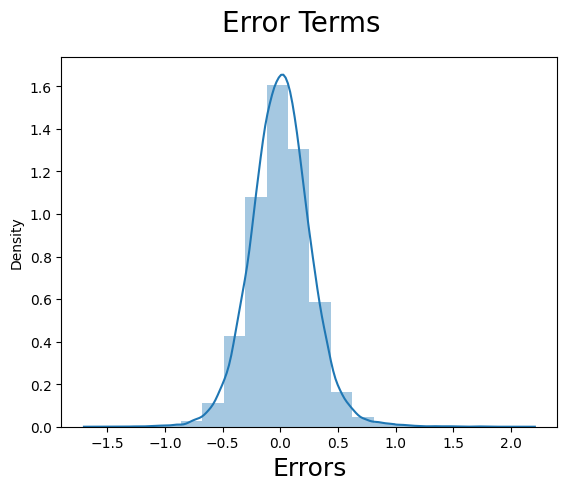

In [ ]:
#fitiing new values
lm = sm.OLS(y_train,X_train_rfe).fit()

#predicting training price
y_train_price = lm.predict(X_train_rfe)

#ploting error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [ ]:
#giving values in X_test
X_test_rfe = X_test[col]

In [ ]:
y_pred = lm.predict(X_test_rfe)


Text(0, 0.5, 'y_pred')

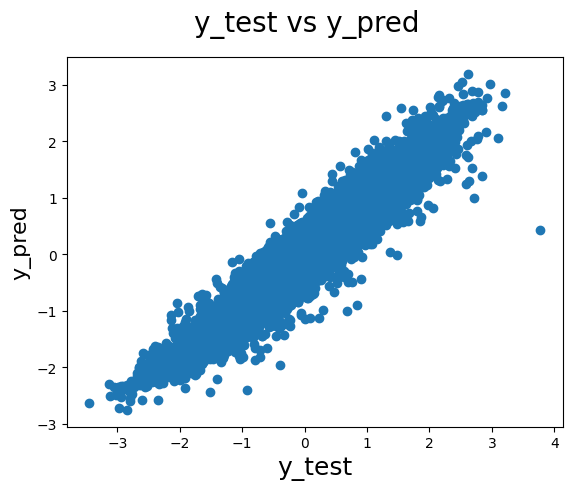

In [ ]:
#scatter plot of linear regression
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

<Axes: xlabel='Log_Sales'>

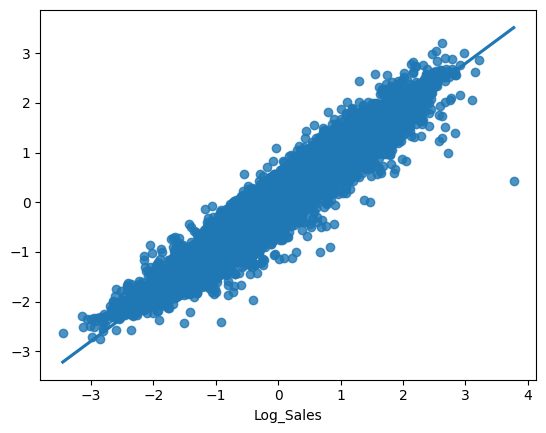

In [ ]:
#regression plot in between y_test and y_pred
sns.regplot(x=y_test,y=y_pred)

In [ ]:
#accuracy score of linear Regression Model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9324301562786228

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

KeyboardInterrupt: 

In [ ]:
X_train_rfe=X_train_rfe.drop('Category_Office Supplies',axis=1)

In [ ]:
X_train_rfe = X_train[col]

#running stats model for descriptive analysis
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)


#fitiing stats model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [ ]:
X_train_new=X_train_rfe

In [ ]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Region_Central Asia',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Region_North Asia',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Segment_Home Office',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Brazil',axis=1)

In [ ]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Region_Caribbean',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Algeria',axis=1)

In [ ]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Egypt',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Italy',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Japan',axis=1)

In [ ]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Uganda',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Kazakhstan',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Cambodia',axis=1)

In [ ]:
X_train_new=X_train_new.drop('Country_Senegal',axis=1)

In [ ]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_price = lm.predict(X_train_new)

#evaluation of the prediction
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [ ]:
num_vars = df_encoded.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head(10)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
df_test.columns

In [ ]:
# y_test = df_test.pop('Log_Sales')
X_test = df_test

In [ ]:
len(col)

In [ ]:
X_test=X_test[col]

In [ ]:
X_test=X_test.drop('Category_Office Supplies',axis=1)

In [ ]:
X_test=X_test.drop('Region_Central Asia',axis=1)

In [ ]:
X_test=X_test.drop('Region_North Asia',axis=1)

In [ ]:
X_test=X_test.drop('Segment_Home Office',axis=1)

In [ ]:
X_test=X_test.drop('Country_Brazil',axis=1)

In [ ]:
X_test=X_test.drop('Region_Caribbean',axis=1)

In [ ]:
X_test=X_test.drop('Country_Algeria',axis=1)

In [ ]:
X_test=X_test.drop('Country_Egypt',axis=1)

In [ ]:
X_test=X_test.drop('Country_Italy',axis=1)

In [ ]:
X_test=X_test.drop('Country_Japan',axis=1)

In [ ]:
X_test = sm.add_constant(X_test)

X_test_new = X_test[X_train_new.columns]

y_pred = lm.predict(X_test_new)

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [ ]:
sns.boxplot(y_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


In [ ]:
print(lm.summary())